## Problema a due punti (applicato all'equazione di Poisson)

Vogliamo risolvere il problema di elettrostatica, a simmetria sferica:

$$\nabla^2\Phi = -{\textstyle 4 \pi \rho}$$

che, in coordinate sferiche, diventa

$${\textstyle 1\over \textstyle r^2}{\textstyle d\over \textstyle dr}\left( r^2 {d\Phi\over dr}\right) = -{4 \pi \rho}$$

Definiamo

$$\phi = r\Phi ~~~~~\mbox{e assumiamo}~~~~~ \rho = {1\over 8\pi} e^{-r} $$

E, siccome:

$$Q = \int^{\infty}_0 \rho(r) 4\pi r^2 dr = 1 $$

si ottiene

$${d^2\phi \over dr^2} = -{1\over 2}r e^{-r} $$

$\rho$ non ha singolarità nell'origine, $\Phi$ è regolare e quindi $\phi(0)=0$ inoltre siccome $Q=1$ il potenziale $\Phi$ tende a $1\over r$ e quindi $\phi(\infty)=1$.

Il problema della soluzione numerica dell'equazione corrisponde quindi ad un problema a due punti: la soluzione è nota a 0 e $\infty$.<br> Tuttavia la maggior parte degli algoritmi di soluzione numerica prevede la conoscenza, in un punto iniziale, della funzione della sua derivata. <br>
<p>
<b>Shooting method</b>:<ul>
<li>Facciamo allora variare $\phi^{\prime}(0)$ e facciamo "evolvere" $\phi(x)$. <br>
<li>Il valore "corretto" sarà quello che fornirà $\phi(\infty)=1$</ul>

[0 1]


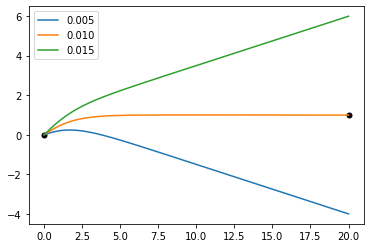

In [155]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

def der(r):
    return -(1./2)*r*m.exp(-r)

def verletpos():
    for i in range(2,len(phi)):
        phi[i] = 2*phi[i-1]-phi[i-2]+h**2*der(r[i-1])  # verlet position
        

n   = 1000
a   = 0
b   = 20
phi = np.ones(n)
r   = np.linspace(a,b,n)
h   = r[1]-r[0]   

matchphi = np.array([0,1])
matchr   = np.array([0,20])
print(matchphi)
plt.plot(matchr,matchphi,'ko',markersize=5)
phi[0]=0
phi[1]=0.005
verletpos()
plt.plot(r,phi,label='0.005')
phi[0]=0
phi[1]=0.010
verletpos()
plt.plot(r,phi,label='0.010')
phi[0]=0
phi[1]=0.015
verletpos()
plt.plot(r,phi,label='0.015')
plt.legend()
plt.show()

Andare a tentativi non è tuttavia la maniera ottimale per trovare la soluzione. Trovare il valore di $\phi^{\prime}(0)$ per cui $\phi(\infty)=1$ corrisponde alla ricerca dello zero di
$$f(\phi^{\prime}(0)) = (\phi(\infty)-1) $$
(dove, approssimiamo $\infty \simeq 20$)

phider  0.010009288787841797


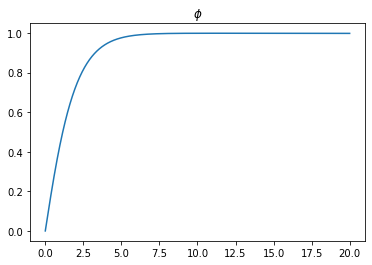

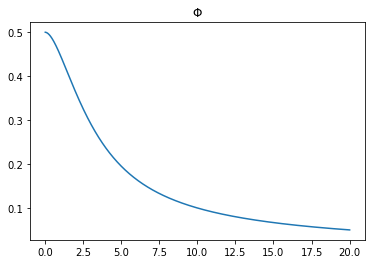

In [156]:
def fun(phider):
    phi[0]=0
    phi[1]=phider
    verletpos()
    return phi[n-1]-1
    
def findZero(fun,min,max,tol):
    med = (min+max)/2
    while (max-min>tol):
        fmed = fun(med);
        fmin = fun(min)
        if (fmin*fmed<=0):
            max = med
        else:
            min = med
        med=(min+max)/2
    return med;

n   = 1000
a   = 0
b   = 20
phi = np.ones(n)
r   = np.linspace(a,b,n)
h   = r[1]-r[0]   

print("phider ",findZero(fun,0,2,0.000001))
plt.plot(r,phi)
plt.title('$\phi$')
plt.show()

Phi = np.ones(n)
Phi[1:n] = phi[1:n]/r[1:n]
plt.plot(r[1:n],Phi[1:n])
plt.title('$\Phi$')
plt.show()